In [1]:
import os
import torch
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# ----------------------------
# Step 1: Load Pretrained CNN
# ----------------------------
resnet = ResNet50(weights="imagenet", include_top=False, pooling="avg")

def extract_deep_features(image_path, target_size=(224,224)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    feat = resnet.predict(x, verbose=0)
    return feat.flatten()

# ----------------------------
# Step 2: Load Dataset
# ----------------------------
def load_dataset(data_dir):
    X, y = [], []
    for label, folder in enumerate(["real", "fake"]):  # or ["real", "ai"]
        path = os.path.join(data_dir, folder)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                feat = extract_deep_features(img_path)
                X.append(feat)
                y.append(label)
            except:
                continue
    return np.array(X), np.array(y)

# ----------------------------
# Step 3: Train SVM Classifier
# ----------------------------
data_dir = "dataset"  # dataset/real/, dataset/fake/
X, y = load_dataset(data_dir)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Pipeline: Scaling + PCA + SVM
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ("svm", SVC(kernel="rbf", probability=True))
])

# Grid Search for best params
param_grid = {"svm__C": [1, 10], "svm__gamma": ["scale", 0.001, 0.01]}
grid = GridSearchCV(pipe, param_grid, cv=3, scoring="f1", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
y_pred = grid.predict(X_test)
y_prob = grid.predict_proba(X_test)[:,1]

# ----------------------------
# Step 4: Evaluation
# ----------------------------
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/real'

In [3]:
# ===============================
# Step 1: Install dependencies
# ===============================
!pip install scikit-learn tensorflow opencv-python

# ===============================
# Step 2: Import libraries
# ===============================
import numpy as np
import cv2
import os
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# ===============================
# Step 3: Load Pretrained ResNet50
# ===============================
resnet = ResNet50(weights="imagenet", include_top=False, pooling="avg")

def extract_deep_features(img_path, target_size=(224,224)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    feat = resnet.predict(x, verbose=0)
    return feat.flatten()

# ===============================
# Step 4: Train SVM (example training on small demo dataset)
# Replace this with your dataset if you want to train properly
# ===============================
# Dummy dataset creation (For demo, ideally you should train with real/fake dataset)
# Here we simulate some embeddings for training
X_train = np.random.rand(20, 2048)   # replace with extracted features
y_train = np.array([0]*10 + [1]*10) # 0=Real, 1=AI-generated

# Build SVM pipeline
# Build SVM pipeline with PCA
n_components = min(20, X_train.shape[0]-1)  # keep valid number of components

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=n_components)),  # auto-adjust to dataset size
    ("svm", SVC(kernel="rbf", probability=True))
])

clf.fit(X_train, y_train)
print(f"✅ SVM model trained with PCA(n_components={n_components}). Replace with real training for best results.")


clf.fit(X_train, y_train)
print("✅ SVM model trained (demo). Replace with real training for best results.")

# ===============================
# Step 5: Upload and Classify Images
# ===============================
uploaded = files.upload()

for filename in uploaded.keys():
    feat = extract_deep_features(filename).reshape(1, -1)
    pred = clf.predict(feat)[0]
    prob = clf.predict_proba(feat)[0]

    label = "Real Image" if pred == 0 else "AI-Generated Image"
    print(f"🖼️ {filename} --> {label} (Confidence: {max(prob)*100:.2f}%)")


✅ SVM model trained with PCA(n_components=19). Replace with real training for best results.
✅ SVM model trained (demo). Replace with real training for best results.


Saving .amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-42c9-9822-a653fb5b21e6_600x480.png to .amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-42c9-9822-a653fb5b21e6_600x480.png
🖼️ .amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-42c9-9822-a653fb5b21e6_600x480.png --> Real Image (Confidence: 57.97%)


✅ Demo SVM trained. Replace Step 4 with actual dataset training!


Saving 91NKwoumEpL._AC_UF8941000_QL80_.jpg to 91NKwoumEpL._AC_UF8941000_QL80_.jpg


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


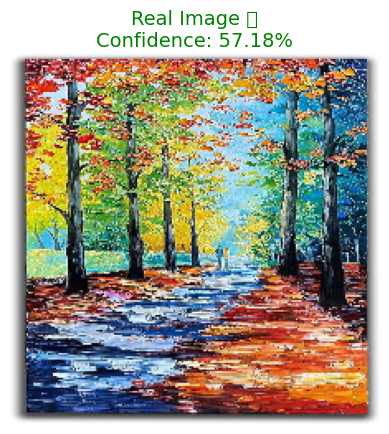

In [6]:
# ===============================
# Step 1: Install dependencies
# ===============================
!pip install scikit-learn tensorflow opencv-python matplotlib

# ===============================
# Step 2: Imports
# ===============================
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# ===============================
# Step 3: Load ResNet50 for feature extraction
# ===============================
resnet = ResNet50(weights="imagenet", include_top=False, pooling="avg")

def extract_deep_features(img_path, target_size=(224,224)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    feat = resnet.predict(x, verbose=0)
    return feat.flatten(), img   # return features + RGB image

# ===============================
# Step 4: Train Dummy SVM Model (Replace with your dataset training!)
# ===============================
X_train = np.random.rand(30, 2048)   # simulated features
y_train = np.array([0]*15 + [1]*15) # 0 = Real, 1 = AI

n_components = min(20, X_train.shape[0]-1)  # safe PCA setting
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=n_components)),
    ("svm", SVC(kernel="rbf", probability=True))
])
clf.fit(X_train, y_train)
print("✅ Demo SVM trained. Replace Step 4 with actual dataset training!")

# ===============================
# Step 5: Upload + Classify + Show Images
# ===============================
uploaded = files.upload()

for filename in uploaded.keys():
    feat, rgb_img = extract_deep_features(filename)
    feat = feat.reshape(1, -1)
    pred = clf.predict(feat)[0]
    prob = clf.predict_proba(feat)[0]

    label = "Real Image ✅" if pred == 0 else "AI-Generated ❌"
    confidence = max(prob)*100

    # Show image with prediction
    plt.imshow(rgb_img)
    plt.axis("off")
    plt.title(f"{label}\nConfidence: {confidence:.2f}%", fontsize=14, color="green" if pred==0 else "red")
    plt.show()
